<a href="https://colab.research.google.com/github/ednatht/NikeShoes_WebScraping/blob/main/web_scraping_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as soup
import time

In [ ]:
# finding suitable shoes with user input:

# 1 user input: man or woman
gender = input("What are you looking for today? Man or Woman product? ")
# the input affect the url..

# 2 print: shoes types
shoes_type_list = {
    'Jordan': 'jordan',
    'Dunk': 'nike_dunk',
    'Air Force': 'airforce1',
    'Air Max': 'air_max_collection',
    'Zoom': 'zoom',
    'React': 'react'
}
keys = list(shoes_type_list.keys())
keys_line = ', '.join(keys)
print("Available Shoes Type: ", keys_line)

# 2 user input: shoes type and budget
shoes_type_key =input("which type of shoes you are looking for? (please copy from the above list)")
shoes_type = shoes_type_list[shoes_type_key]
while True:
    try:
        min_budget = float(input("What is your price range? Min: "))
        break  # Break out of the loop if input is a valid numeric value
    except ValueError:
        print("Invalid input. Please enter a numeric value.")

while True:
    try:
        max_budget = float(input("What is your price range? Max: "))
        break  # Break out of the loop if input is a valid numeric value
    except ValueError:
        print("Invalid input. Please enter a numeric value.")

#3 get the customized url: 36 records per page since it requires curser hovering for auto page loading
total_pages = 5
shoes_data = []

for page in range(1, total_pages + 1):
    page_url = f'https://www.nike.com.hk/{gender}/{shoes_type}/shoe/list.htm?intpromo=PNTP&page={page}&limit=36'
    page_html = requests.get(page_url).content
    page_soup = soup(page_html, "html.parser")

    # Extract the shoe details from the page
    shoes_list = page_soup.find_all('dl', {'class': 'product_list_content'})
    for shoe in shoes_list:
        name = shoe.find('span', {"class": 'up'}).text.strip()
        price = shoe.find('dd', {"class": "color666"}).text.strip()
        price = float(price.split('HK$')[-1].replace(',', ''))
        if min_budget <= price <= max_budget:
            shoes_data.append({'Name': name, 'Price': price})

    time.sleep(1)

#4 put the data into a data frame for better visualization with price sorting
shoes_data = pd.DataFrame(shoes_data).sort_values('Price')
shoes_data

What are you looking for today? Man or Woman product? man
Available Shoes Type:  Jordan, Dunk, Air Force, Air Max, Zoom, React
which type of shoes you are looking for? (please copy from the above list)Jordan
What is your price range? Min: 0
What is your price range? Max: 
Invalid input. Please enter a numeric value.
What is your price range? Max: a
Invalid input. Please enter a numeric value.
What is your price range? Max: 999


,Name,Price
34,Jordan Post Slide,169.0
35,Jordan Post Slide,199.0
38,Jordan Super Play Slide,359.0
37,Jordan Crater Slide,419.0
21,Jordan Series ES,419.0
29,Jordan Series ES,479.0
28,Jordan Nu Retro 1 Low,519.0
33,Jordan System.23,559.0
49,Jordan Luka 1 PF,589.0
48,Jordan Stadium 90,629.0


In [ ]:
# lets do another web scraping to scrape the man / woman shoes products for some data visualization

import time

#function to detect shoes type
def detect_shoe_type(product_name):
    for shoe_type in allshoes_type_list:
        if shoe_type.lower() in product_name.lower():
            return shoe_type
    return 'others'
# 1 user input: man / woman
allshoes_gender = input("Would you like to scrape man's or woman's products? ")
allshoes_url = f'https://www.nike.com.hk/{allshoes_gender}/shoe/list.htm?intpromo=PNTP&limit=36'
total_pages = 20

allshoes_data = []
allshoes_type_list = ['Jordan', 'Dunk', 'Air Force', 'Air Max', 'Zoom', 'React']

#2 get the customized url: 36 records per page since it requires curser hovering for auto page loading
for page in range(1, total_pages + 1):
    allpage_url = f'{allshoes_url}&page={page}'
    allpage_html = requests.get(allpage_url).content
    allpage_soup = soup(allpage_html, "html")

    # Extract the shoe details from the page
    allshoes_list = allpage_soup.findAll('dl', {'class': 'product_list_content'})
    for shoe in allshoes_list:
        name = shoe.find('span', {"class": 'up'}).text.strip()
        price = shoe.find('dd', {"class": "color666"}).text.strip()
        price = float(price.split('HK$')[-1].replace(',', ''))
        allshoes_data.append({'Name': name, 'Price': price})

    time.sleep(1)


#4 put the data into a data frame for better visualization with price sorting
allshoes_df = pd.DataFrame(allshoes_data)

#5 detect shoes type
allshoes_df['Shoe Type'] = allshoes_df['Name'].apply(detect_shoe_type)

allshoes_df

Would you like to scrape man's or woman's products? man


,Name,Price,Shoe Type
0,Nike Dunk Low Retro BTTYS,749.0,Dunk
1,Nike Dunk Low Retro,749.0,Dunk
2,Nike P-6000,699.0,others
3,Nike Zoom Vomero 5 PRM,1099.0,Zoom
4,Nike Dunk Low Retro,749.0,Dunk
...,...,...,...
450,Nike Blazer Low '77,649.0,others
451,Air Jordan 1 Retro HI OG,1399.0,Jordan
452,Nike Air Zoom Victory,909.0,Zoom
453,Air Jordan Legacy 312 Low,699.0,Jordan


In [ ]:
# lets do some visualization based on your scraping

filtered_df = allshoes_df[allshoes_df['Shoe Type'] != 'others']

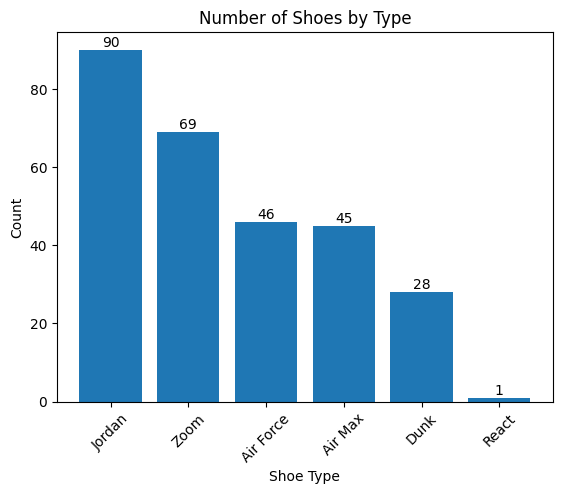

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each shoe type
shoe_type_counts = filtered_df['Shoe Type'].value_counts()

# Create a bar chart
plt.bar(shoe_type_counts.index, shoe_type_counts.values)

# Set the labels and title
plt.xlabel('Shoe Type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Number of Shoes by Type')

# Add count values to the bars
for i, count in enumerate(shoe_type_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Display the chart
plt.show()

<Axes: xlabel='Shoe Type', ylabel='Price'>

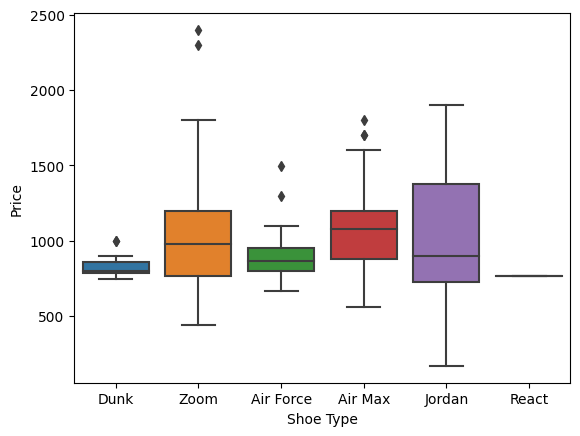

In [ ]:
# Boxplot provides a visual summary of the distribution, including median, quartiles, and any outliers. It can help identify the range, spread, and skewness of the price data.
import seaborn as sns

sns.boxplot(x='Shoe Type', y ='Price',data=filtered_df)

In [ ]:
# more statistical summary of the price distribution
filtered_df.groupby('Shoe Type')['Price'].describe()


,count,mean,std,min,25%,50%,75%,max
Shoe Type,,,,,,,,
Air Force,46.0,884.434783,148.992267,669.0,799.0,864.0,949.0,1499.0
Air Max,45.0,1073.222222,298.926024,559.0,879.0,1079.0,1199.0,1799.0
Dunk,28.0,828.285714,70.759298,749.0,789.0,799.0,861.5,999.0
Jordan,90.0,1003.666667,371.677642,169.0,726.5,899.0,1374.0,1899.0
React,1.0,769.000000,NaN,769.0,769.0,769.0,769.0,769.0
Zoom,69.0,1023.637681,403.734696,439.0,769.0,979.0,1199.0,2399.0
